# Plot di picchi su intensità per ciascun spot

In [1]:
from tre_spot import raccoglitore_1, raccoglitore_2 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=1', 'ass=0']
arr_spot = [1, 2, 3]

In [2]:
np.set_printoptions(legacy='1.25')

In [3]:
raccoglitore_1['spot1']['ass=1']

{'emi=0': [{'Regione 1': [(711.6402333737872,
     0.020796805850953535,
     6.130499697634939,
     3137.446987675406)],
   'Regione 2': [(817.5805608127403,
     0.0803352595585072,
     5.451667519512428,
     14447.538927329404)]}]}

## REFERENCE

### Estraggo i due picchi e il loro errore

In [4]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [5]:
for spot in arr_spot:
    data['spot'+str(spot)] = {}
    for ass in d_o_ass:
        
        data['spot'+str(spot)][ass] = {}
        
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            
            data['spot'+str(spot)][ass][emi] = []
            arr_picchi_sx  = []
            arr_err_picchi_sx  = []
            arr_picchi_dx  = []
            arr_err_picchi_dx  = []
            
            #print(ass, ' | ', emi)
            
            if len(raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 1']) > 0:
                picco_sx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 1'][0][0]
                err_picco_sx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 1'][0][1]
                
            else:
                picco_sx, err_picco_sx = 0, 0
                
            if len(raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 2']) > 0:
                picco_dx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 2'][0][0]
                err_picco_dx = raccoglitore_1['spot'+str(spot)][ass][emi][0]['Regione 2'][0][1]
            else:
                picco_dx, err_picco_dx = 0, 0
            
            # conversione dei nm in eV degli errori
            # err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            # err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx = err_lambda_to_E(picco_sx, 0.7508320802)
            err_picco_dx = err_lambda_to_E(picco_dx, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx = lambda_to_E(picco_sx)
            picco_dx = lambda_to_E(picco_dx)
                        
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx)
            arr_err_picchi_sx.append(err_picco_sx)
            arr_picchi_dx.append(picco_dx)
            arr_err_picchi_dx.append(err_picco_dx)    
            
            # riempimento del contenitore data    
            data['spot'+str(spot)][ass][emi].append(arr_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_picchi_dx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_dx)
                        

### Plot

Un grafico per ciascun spot. ass=1,emi=0 viene messo per primo in ordinata.

In [6]:
# OCCHIO! QUESTE ERANO INVERTITE!!!
etichette_x = ["ass=1\nemi=0", 
               "ass=0\nemi=0.5", 
               "ass=0\nemi=1", 
               "ass=0\nemi=1.5", 
               "ass=0\nemi=2", 
               "ass=0\nemi=2.5", 
               "ass=0\nemi=3"]

In [7]:
etichette_x = ["ass=0\nemi=1", 
               "ass=0.5\nemi=0", 
               "ass=1\nemi=0", 
               "ass=1.5\nemi=0", 
               "ass=2\nemi=0", 
               "ass=2.5\nemi=0", 
               "ass=3\nemi=0"]

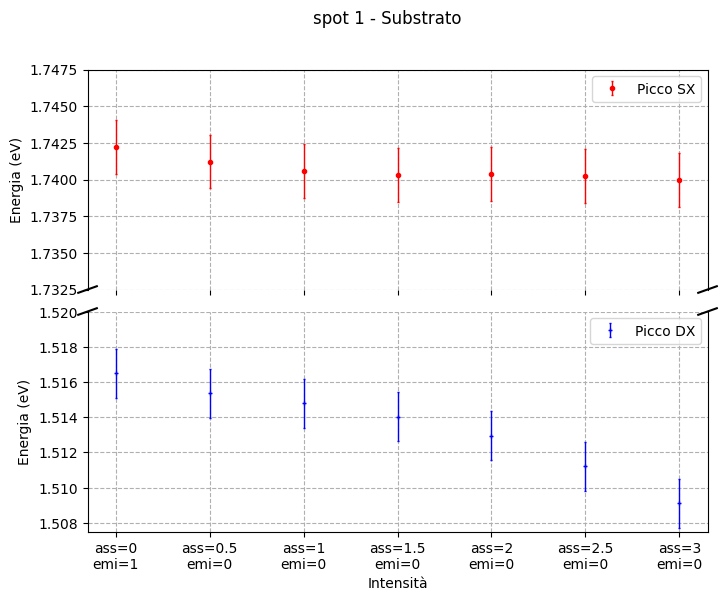

picco SX:
[1.7422450423757465, 1.7412255346729357, 1.7405905718157086, 1.740293790410092, 1.7403509080454838, 1.7402577550350438, 1.739971814889813]
errore picco SX:
[0.0018381949305809205, 0.0018360442508242249, 0.0018347054152583356, 0.0018340798114661536, 0.0018342002049556295, 0.00183400385754392, 0.0018334012200958026]
picco DX:
[1.516488683779478, 1.5153649904854287, 1.5147994018617905, 1.514023627152979, 1.5129469249846574, 1.5112056225587298, 1.5091026565062953]
errore picco DX:
[0.0013926803150872595, 0.0013906171731092965, 0.0013895793103110335, 0.0013881563833609259, 0.0013861827027582998, 0.0013829937286815065, 0.0013791473093876145]


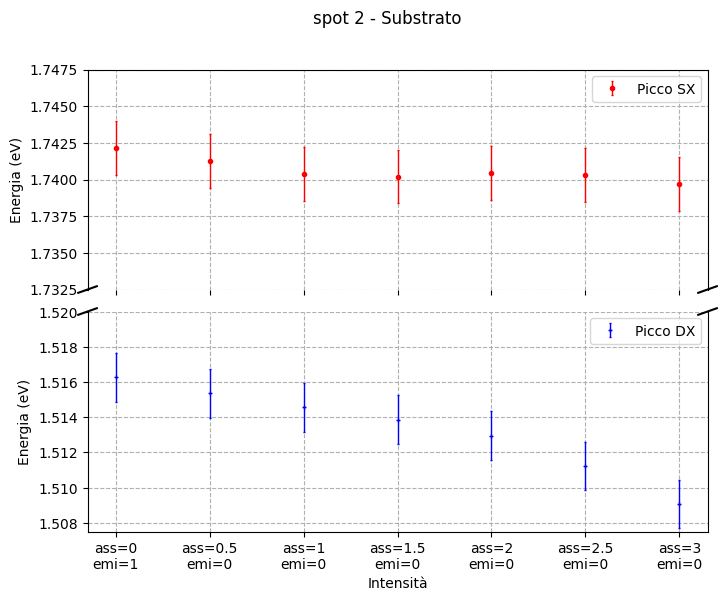

picco SX:
[1.7421274125402526, 1.7412725582414526, 1.7403559432225244, 1.7402021408539545, 1.7404248246280625, 1.7402830891034815, 1.7397101584842152]
errore picco SX:
[0.0018379467229377607, 0.001836143420652284, 0.0018342108183739669, 0.0018338866392840602, 0.001834356013407172, 0.001834057255515918, 0.001832849848977023]
picco DX:
[1.5162769550767945, 1.5153527255092243, 1.5145527746555534, 1.513850333382109, 1.5129479865154503, 1.511218534659996, 1.5090621733728316]
errore picco DX:
[0.0013922914565155436, 0.0013905946626017662, 0.0013891268673482645, 0.0013878386273063418, 0.0013861846479370967, 0.0013830173620390024, 0.0013790733164680802]


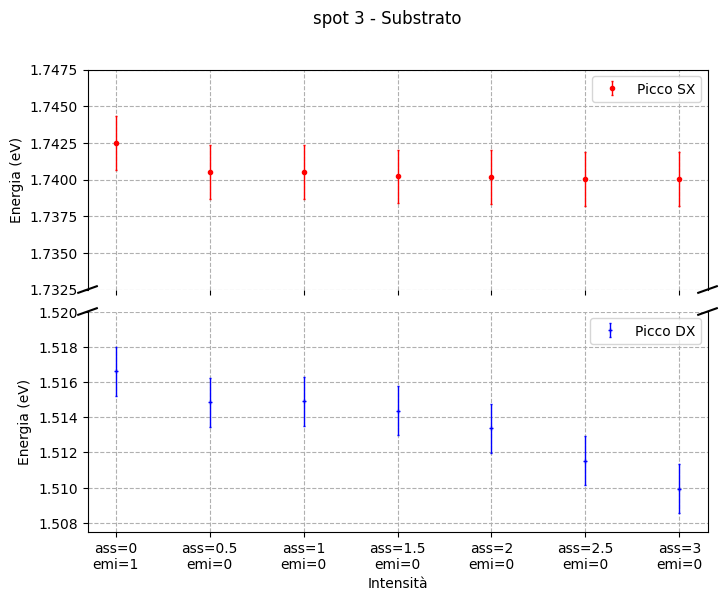

picco SX:
[1.742502857122472, 1.7405201595075834, 1.7405319515064854, 1.740206663782751, 1.740186668717287, 1.7400530635384277, 1.7400182251673064]
errore picco SX:
[0.0018387389973607909, 0.0018345569791675914, 0.0018345818374457883, 0.0018338961721415077, 0.0018338540292580038, 0.001833572446834225, 0.0018334990260412073]
picco DX:
[1.5166185141547057, 1.5148520341594212, 1.5149115589806268, 1.514368916040227, 1.513370403197665, 1.511516343013425, 1.5099319228557049]
errore picco DX:
[0.0013929187869594281, 0.0013896758749417492, 0.0013897850893486148, 0.0013887896226588213, 0.0013869588044419891, 0.0013835625045142996, 0.001380663435121405]


In [8]:
for spot in arr_spot:
    # picco sx
    x1 = []
    y1 = []
    err_y1 = []
    # picco dx
    x2 = []
    y2 = []
    err_y2 = []
    
    i = 1

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x1.append(i)
            x2.append(i)
        
            # picco sx
            y1.append(data['spot'+str(spot)][ass][emi][0][0])
            err_y1.append(data['spot'+str(spot)][ass][emi][1][0])
            
            # picco dx
            y2.append(data['spot'+str(spot)][ass][emi][2][0])
            err_y2.append(data['spot'+str(spot)][ass][emi][3][0])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
    y1 = [y_val for y_val in y1 if y_val != 0]
    err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
    
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]
    err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

    # Primo asse: picco SX
    ax1.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX', markersize=3, elinewidth=1, capsize=1)
    ax1.set_ylim(1.7325, 1.7475)  # Intervallo per il primo picco

    # Secondo asse: picco DX
    ax2.errorbar(x2, y2, yerr=err_y2, fmt='b+', label='Picco DX', markersize=3, elinewidth=1, capsize=1)
    ax2.set_ylim(1.5075, 1.52)  # Intervallo per il secondo picco

    # Etichette personalizzate per l'asse x
    ax2.set_xticks(range(1, 8))
    ax2.set_xticklabels(etichette_x)

    # Rimuovi lo spazio tra i due subplot
    plt.subplots_adjust(hspace=0.1)

    # Personalizzazione degli assi spezzati
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.tick_params(labeltop=False)
    ax2.tick_params(labelbottom=True)

    # Linee diagonali per indicare il taglio
    d = 0.015  # Grandezza delle linee diagonali
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)  # Aggiorna per il secondo asse
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Titolo, etichette e legenda
    ax1.set_ylabel('Energia (eV)')
    ax2.set_ylabel('Energia (eV)')
    ax2.set_xlabel('Intensità')
    ax1.legend()
    ax2.legend()
    ax1.grid(linestyle='--')
    ax2.grid(linestyle='--')

    # Mostrare il grafico
    plt.suptitle('spot ' + str(spot) + ' - Substrato')
    plt.show()
    
    
    # STAMPA DEI VALORI
    print ('picco SX:')
    print (y1)
    print ('errore picco SX:')
    print (err_y1)
    
    print ('picco DX:')
    print (y2)
    print ('errore picco DX:')
    print (err_y2)

## REFERENCE + QD

### Estraggo i due picchi e il loro errore

In [9]:
raccoglitore_2['spot1']['ass=0']['emi=1'][0]['Regione 1'][1]

(745.5387021774308, 0.4667550023159126, 8.174532166640176, 404.7760093603184)

In [10]:
for spot in arr_spot:
    data['spot'+str(spot)] = {}
    for ass in d_o_ass:
        
        data['spot'+str(spot)][ass] = {}
        
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            
            data['spot'+str(spot)][ass][emi] = []
            arr_picchi_sx  = []
            arr_err_picchi_sx  = []
            arr_picchi_dx  = []
            arr_err_picchi_dx  = []
            
            #print(ass, ' | ', emi)
            
            if len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1']) == 1:
                picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][0]
                err_picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][1]
                picco_sx_2 = 0
                err_picco_sx_2 = 0
            elif len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1']) == 2:
                picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][0]
                err_picco_sx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][0][1]
                picco_sx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][1][0]
                err_picco_sx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 1'][1][1]
            else:
                picco_sx_1, err_picco_sx_1 = 0, 0
                picco_sx_2, err_picco_sx_2 = 0, 0
                
            if len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2']) == 1:
                picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][0]
                err_picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][1]
                picco_dx_2, err_picco_dx_2 = 0, 0
            elif len(raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2']) == 2:
                picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][0]
                err_picco_dx_1 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][0][1]
                picco_dx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][1][0]
                err_picco_dx_2 = raccoglitore_2['spot'+str(spot)][ass][emi][0]['Regione 2'][1][1]
                
            else:
                picco_dx_1, err_picco_dx_1 = 0, 0
                picco_dx_2, err_picco_dx_2 = 0, 0
           
            # conversione dei nm in eV degli errori
            # err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            # err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx_1 = err_lambda_to_E(picco_sx_1, 0.7508320802)
            err_picco_dx_1 = err_lambda_to_E(picco_dx_1, 0.7508320802)
            
            err_picco_sx_2 = err_lambda_to_E(picco_sx_2, 0.7508320802)
            err_picco_dx_2 = err_lambda_to_E(picco_dx_2, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx_1 = lambda_to_E(picco_sx_1)
            picco_dx_1 = lambda_to_E(picco_dx_1)
            picco_sx_2 = lambda_to_E(picco_sx_2)
            picco_dx_2 = lambda_to_E(picco_dx_2)
                        
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx_1)
            arr_picchi_sx.append(picco_sx_2)
            arr_err_picchi_sx.append(err_picco_sx_1)
            arr_err_picchi_sx.append(err_picco_sx_2)
            arr_picchi_dx.append(picco_dx_1)
            arr_picchi_dx.append(picco_dx_2)
            arr_err_picchi_dx.append(err_picco_dx_1)    
            arr_err_picchi_dx.append(err_picco_dx_2)    
            
            # riempimento del contenitore data    
            data['spot'+str(spot)][ass][emi].append(arr_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_sx)
            data['spot'+str(spot)][ass][emi].append(arr_picchi_dx)
            data['spot'+str(spot)][ass][emi].append(arr_err_picchi_dx)
                        

### Plot

Un grafico per ciascun spot. ass=1,emi=0 viene messo per primo in ordinata.

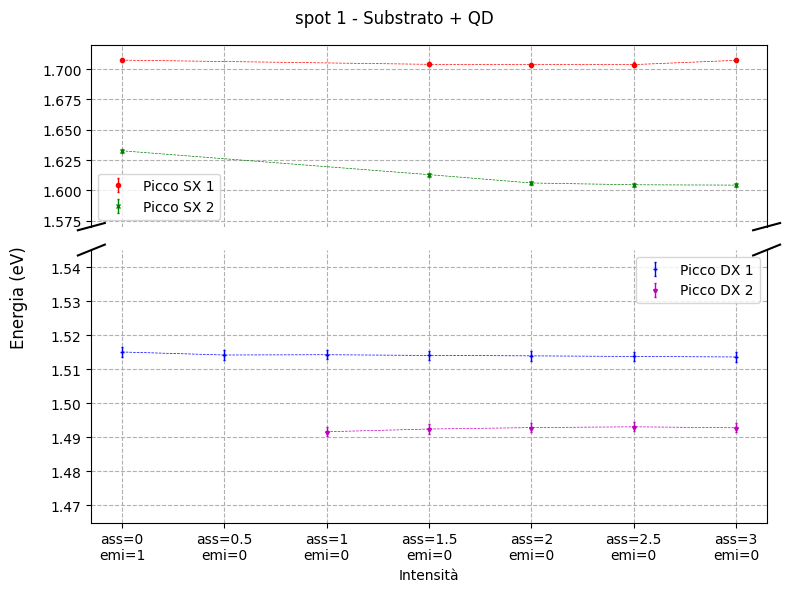

picco SX 1:
[1.7075145607828541, 1.7040382185409995, 1.7037819480108634, 1.703808482701218, 1.7073362743950014]
errore picco SX 1:
[0.0017656390316643695, 0.0017584569934850761, 0.0017579281241028267, 0.0017579828804543968, 0.0017652703402594304]
picco SX 2:
[1.6326297286753046, 1.6129549253035298, 1.6060684543081698, 1.604579117909282, 1.6042882670913454]
errore picco SX 2:
[0.0016141670951221204, 0.0015754968939608613, 0.0015620725230554404, 0.0015591767899629475, 0.0015586115990797742]
picco DX 1:
[1.5150740325397936, 1.5141860160158012, 1.514264548069312, 1.5140572470515665, 1.5139344530986165, 1.513759221714277, 1.5136050104574965]
errore picco DX 1:
[0.0013900832129417125, 0.001388454176897844, 0.0013885982027759764, 0.001388218033911368, 0.0013879928669070084, 0.001387671577124356, 0.0013873888588760398]
picco DX 2:
[1.491649954806837, 1.4924505821323766, 1.492868077473548, 1.493106970055507, 1.4928079560654635]
errore picco DX 2:
[0.0013474322194145323, 0.001348879047560155, 0.

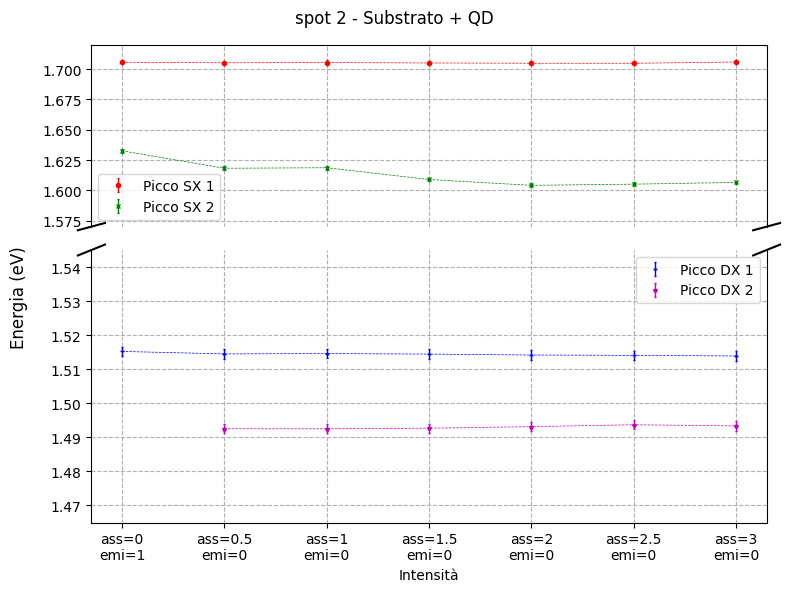

picco SX 1:
[1.705727615601335, 1.7053215323098252, 1.7054894229910977, 1.7051781971543232, 1.7049241281556153, 1.7049118137396397, 1.7059421694380639]
errore picco SX 1:
[0.001761945418388813, 0.0017611065840765483, 0.0017614533667017229, 0.0017608105485515384, 0.0017602858713709401, 0.001760260442891381, 0.0017623886965786348]
picco SX 2:
[1.6326297286753046, 1.6182285171313853, 1.6186417842294147, 1.608938437660402, 1.6041125115497348, 1.6050883712902633, 1.6065195680659903]
errore picco SX 2:
[0.0016141670951221204, 0.0015858159795987786, 0.0015866260620381592, 0.001567660239704302, 0.0015582701147890587, 0.0015601666346436052, 0.0015629501585864042]
picco DX 1:
[1.5152331733299031, 1.5145077567104681, 1.5146022199196987, 1.5144543548937248, 1.514181778961312, 1.5140775802825233, 1.5139069664114453]
errore picco DX 1:
[0.0013903752522141232, 0.0013890442889017615, 0.0013892175698542726, 0.0013889463347242677, 0.0013884464064552297, 0.001388255320675122, 0.0013879424671300344]
picco

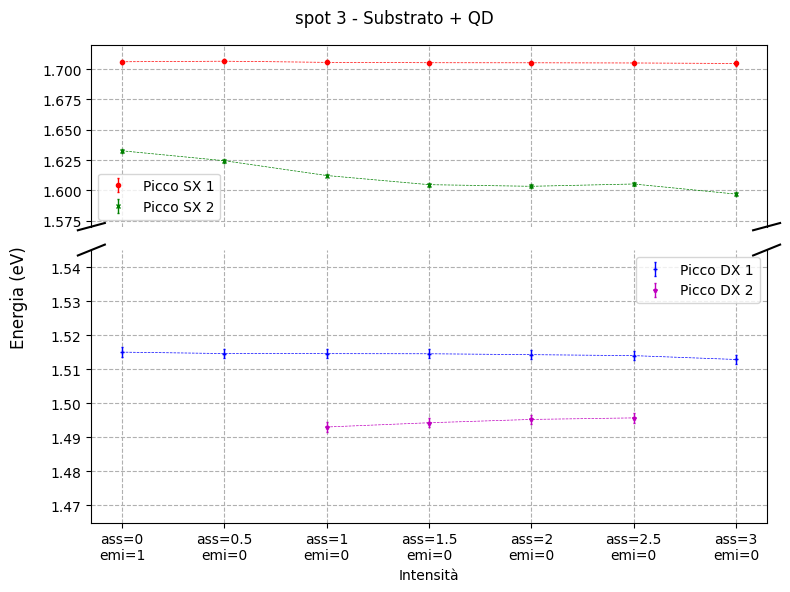

picco SX 1:
[1.7061429596717232, 1.7066304744438927, 1.7056728673487698, 1.7053590807655066, 1.7053054442537372, 1.7051606363878402, 1.7047707880060912]
errore picco SX 1:
[0.0017628035890291374, 0.001763811143017546, 0.0017618323148852874, 0.0017611841384371464, 0.0017610733555653046, 0.0017607742813465098, 0.0017599692468878835]
picco SX 2:
[1.6326297286753046, 1.624435726151682, 1.6122273783680707, 1.6046652379923294, 1.6033186872783605, 1.6052180560035203, 1.5968950438176026]
errore picco SX 2:
[0.0016141670951221204, 0.001598005074037691, 0.0015740759126264285, 0.0015593441610031705, 0.0015567282197468935, 0.001560418755261988, 0.001544279247425524]
picco DX 1:
[1.5150279285997363, 1.5146161876265574, 1.5145784449485329, 1.5145492011718373, 1.5142848204136587, 1.5140003496694177, 1.512870150258282]
errore picco DX 1:
[0.0013899986133292328, 0.0013892431927841698, 0.0013891739566230178, 0.0013891203122562703, 0.0013886353829759524, 0.001388113699034979, 0.001386042022215305]
picco 

In [11]:
for spot in arr_spot:
    # picco sx 1
    x1 = []
    y1 = []
    err_y1 = []
    # picco sx 2
    x2 = []
    y2 = []
    err_y2 = []
    # picco dx 1
    x3 = []
    y3 = []
    err_y3 = []
    # picco dx 2
    x4 = []
    y4 = []
    err_y4 = []
    
    i = 1
    

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x1.append(i)
            x2.append(i)
            x3.append(i)
            x4.append(i)
        
            # picco sx 1
            y1.append(data['spot'+str(spot)][ass][emi][0][0])
            err_y1.append(data['spot'+str(spot)][ass][emi][1][0])
            # picco sx 2
            y2.append(data['spot'+str(spot)][ass][emi][0][1])
            err_y2.append(data['spot'+str(spot)][ass][emi][1][1])
            
            # picco dx 1
            y3.append(data['spot'+str(spot)][ass][emi][2][0])
            err_y3.append(data['spot'+str(spot)][ass][emi][3][0])
            # picco dx 2
            y4.append(data['spot'+str(spot)][ass][emi][2][1])
            err_y4.append(data['spot'+str(spot)][ass][emi][3][1])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
    y1 = [y_val for y_val in y1 if y_val != 0]
    err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
    
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]
    err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
    
    x3 = [x_val for x_val, y_val in zip(x3, y3) if y_val != 0]
    y3 = [y_val for y_val in y3 if y_val != 0]
    err_y3 = [e_y_val for e_y_val in err_y3 if e_y_val != 0]
    
    x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
    y4 = [y_val for y_val in y4 if y_val != 0]
    err_y4 = [e_y_val for e_y_val in err_y4 if e_y_val != 0]
    
    # Creazione della figura
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 6]}, figsize=(8, 6))

    # Plot superiore (range > 1.59)
    ax1.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX 1', markersize=3, elinewidth=1, capsize=1)
    ax1.plot(x1, y1, linestyle='--', color='r', linewidth=0.5) # unisce i punti
    ax1.errorbar(x2, y2, yerr=err_y2, fmt='gx', label='Picco SX 2', markersize=3, elinewidth=1, capsize=1)
    ax1.plot(x2, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti
    ax1.errorbar(x3, y3, yerr=err_y3, fmt='b+', markersize=3, elinewidth=1, capsize=1)
    ax1.errorbar(x4, y4, yerr=err_y4, fmt='m*', markersize=3, elinewidth=1, capsize=1)
    ax1.set_ylim(1.57, 1.72)  # Intervallo superiore
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(bottom=False)
    ax1.grid(linestyle='--')
    
    # Plot inferiore (range < 1.54)
    ax2.errorbar(x1, y1, yerr=err_y1, fmt='ro', markersize=3, elinewidth=1, capsize=1)
    ax2.errorbar(x2, y2, yerr=err_y2, fmt='gx', markersize=3, elinewidth=1, capsize=1)
    ax2.errorbar(x3, y3, yerr=err_y3, fmt='b+', label='Picco DX 1', markersize=3, elinewidth=1, capsize=1)
    ax2.plot(x3, y3, linestyle='--', color='b', linewidth=0.5) # unisce i punti
    ax2.errorbar(x4, y4, yerr=err_y4, fmt='m*', label='Picco DX 2', markersize=3, elinewidth=1, capsize=1)
    ax2.plot(x4, y4, linestyle='--', color='m', linewidth=0.5) # unisce i punti
    ax2.set_ylim(1.465, 1.545)  # Intervallo inferiore
    ax2.spines['top'].set_visible(False)
    ax2.grid(linestyle='--')

    # Aggiunta della "scaletta" per indicare il break
    d = 0.02  # Distanza delle linee spezzate
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)  # Linea spezzata in alto
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Linea spezzata in basso
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    # Etichette e titolo
    ax2.set_xlabel('Intensità')
    ax2.set_xticks(range(1, 8))
    ax2.set_xticklabels(etichette_x)
    ax1.legend()
    ax2.legend()
    fig.supylabel('Energia (eV)')
    fig.suptitle('spot ' + str(spot) + ' - Substrato + QD')
    
    # Mostrare il grafico
    plt.tight_layout()
    plt.show()
    
    # STAMPA DEI VALORI
    print ('picco SX 1:')
    print (y1)
    print ('errore picco SX 1:')
    print (err_y1)
    print ('picco SX 2:')
    print (y2)
    print ('errore picco SX 2:')
    print (err_y2)
    
    print ('picco DX 1:')
    print (y3)
    print ('errore picco DX 1:')
    print (err_y3)
    print ('picco DX 2:')
    print (y4)
    print ('errore picco DX 2:')
    print (err_y4)
    
            

## Stampa dei valori